In [1]:
from keras.datasets import mnist

2022-12-14 18:15:50.834710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-14 18:15:50.834793: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [3]:
print(train_images.shape)

(60000, 28, 28)


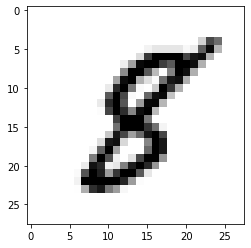

8


In [5]:
import matplotlib.pyplot as plt
sira=202
plt.imshow(train_images[sira],cmap=plt.cm.binary)
plt.show()
print(train_labels[sira])

In [3]:
from keras import models
from keras import layers

In [4]:
network = models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
# network.add(layers.Dense(128,activation="relu"))
# network.add(layers.Dense(128,activation="relu"))
network.add(layers.Dense(10,activation="softmax"))
network.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

2022-12-14 18:16:54.637338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-14 18:16:54.738742: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-14 18:16:54.739012: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (serkan-pc): /proc/driver/nvidia/version does not exist
2022-12-14 18:16:54.870367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
train_images=train_images.reshape((60_000,28*28))
train_images=train_images.astype("float32")/255

In [6]:
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)

In [7]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

2022-12-14 18:17:13.297269: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
469/469 [==============================] - 17s 31ms/step - loss: 0.2526 - accuracy: 0.9277
Epoch 2/5
469/469 [==============================] - 15s 31ms/step - loss: 0.1036 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 14s 31ms/step - loss: 0.0683 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 14s 31ms/step - loss: 0.0491 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0368 - accuracy: 0.9894


In [11]:
network.save("mnist_ann_model.h5")

In [ ]:
import cv2
resim=cv2.imread("/home/serkan/Belgeler/yillar/2022-2023/bilsem22_23/2022-oyg2-a1/yapay_zeka/rakam.png")